In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from plots import *
from math import sqrt
# latexify(fig_width = 10)

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

rc('font', **{'family': 'sans-serif',
              'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 12,
          'legend.fontsize': 12,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': True,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)

sns.set_context("poster")
sns.set_style("ticks")

In [3]:
xls = pd.ExcelFile("Final Plotting/Experiment - 3.xlsx")

In [4]:
df1 = pd.read_excel(xls, sheet_name="VGG", index_col=0)

In [5]:
df1.head()

,Unnamed: 1,Accuracy on CIFAR10,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
NaN,Percentage of Weights Prune,Adam after SGD,SGD after Adam,SGD after SGD,Adam after Adam,Random (SGD),Random (Adam)
0.0,0,92.58,91.12,92.58,91.12,92.58,91.12
1.0,20,91.54,92.43,92.88,91.51,91.7,90.54
2.0,36,91.43,92.18,92.57,91.39,90.28,87.84
3.0,48.8,91.28,92.62,92.63,91.39,87.89,86.22


In [6]:
df1 = df1.rename(columns = {"Unnamed: 1":"% Pruned", "Accuracy on CIFAR10":"Adam after SGD", "Unnamed: 3":"SGD after Adam", "Unnamed: 4":"SGD after SGD", "Unnamed: 5":"Adam after Adam", "Unnamed: 6":"Random(SGD)", "Unnamed: 7":"Random(Adam)"})


In [7]:
df1 = df1.iloc[1:]

In [8]:
df1.dropna(inplace = True)

In [9]:
x = np.float64(df1["% Pruned"].values)
adam_after_sgd = np.float64(df1["Adam after SGD"].values)
sgd_after_adam = np.float64(df1["SGD after Adam"].values)
sgd_after_sgd = np.float64(df1["SGD after SGD"].values)
adam_after_adam = np.float64(df1["Adam after Adam"].values)
random_sgd = np.float64(df1["Random(SGD)"].values)
random_adam = np.float64(df1["Random(Adam)"].values)

In [10]:
idx_vals = [0,20,36,48.8,59.04,67.23,73.79,86.58,93.13,96.48,98.2,99.08,99.53,99.81,99.88]
idx = []
for i in range(len(x)):
    for j in range(len(idx_vals)):
        if x[i] == idx_vals[j]:
            idx.append(i)
idx.sort()

# CIFAR-10 with SGD

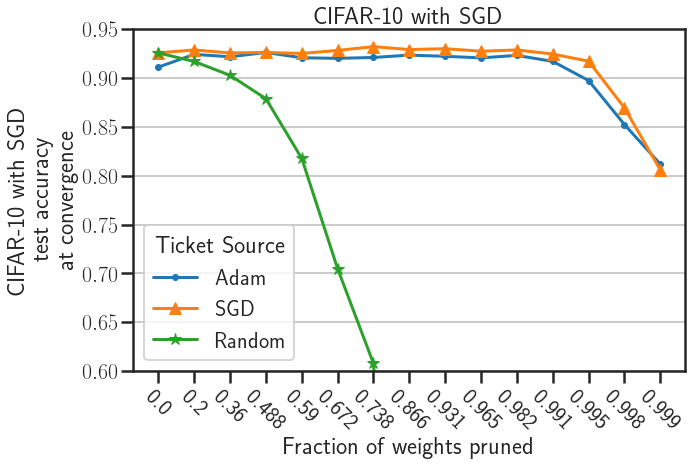

In [11]:
plt.figure(figsize=(10,7))
plt.plot([i for i in range(len(idx))], [sgd_after_adam[i]/100 for i in idx], label='Adam', marker = '.')
plt.plot([i for i in range(len(idx))], [sgd_after_sgd[i]/100 for i in idx], label="SGD", marker='^')
plt.plot([i for i in range(len(idx))], [random_sgd[i]/100 for i in idx], label='Random', marker='*')
plt.title("CIFAR-10 with SGD")
plt.xlabel("Fraction of weights pruned")
plt.ylabel("CIFAR-10 with SGD\ntest accuracy\n at convergence")
tick_lbls = [np.round(x[i]/100, 3) for i in idx]
plt.xticks(range(len(idx)), tick_lbls, rotation = -45)
plt.grid(axis='y')
plt.legend(loc="best",title="Ticket Source")
plt.tight_layout()
plt.ylim(0.6,0.95)
plt.savefig("finalplots/Exp3_CIFAR10_SGD_N.pdf")

# CIFAR-10 with Adam

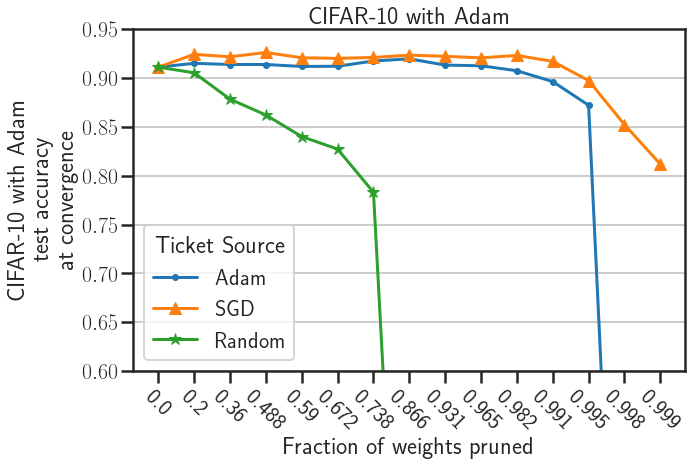

In [12]:
plt.figure(figsize=(10,7))
plt.plot([i for i in range(len(idx))], [adam_after_adam[i]/100 for i in idx], label='Adam', marker = '.')
plt.plot([i for i in range(len(idx))], [sgd_after_adam[i]/100 for i in idx], label="SGD", marker='^')
plt.plot([i for i in range(len(idx))], [random_adam[i]/100 for i in idx], label='Random', marker='*')
plt.title("CIFAR-10 with Adam")
plt.xlabel("Fraction of weights pruned")
plt.ylabel("CIFAR-10 with Adam\ntest accuracy\n at convergence")
tick_lbls = [np.round(x[i]/100, 3) for i in idx]
plt.xticks(range(len(idx)), tick_lbls, rotation = -45)
plt.grid(axis='y')
plt.legend(loc="best",title="Ticket Source")
plt.tight_layout()
plt.ylim(0.6,0.95)
plt.savefig("finalplots/Exp3_CIFAR10_Adam_N.pdf")